In [23]:
from sklearn.model_selection import train_test_split

# 트레인 데이터랑 테스트 데이터 나누기
train_data, test_data = train_test_split(df, test_size = 0.25, random_state = 42)
len(train_data), len(test_data)

(2253, 751)

<AxesSubplot:>

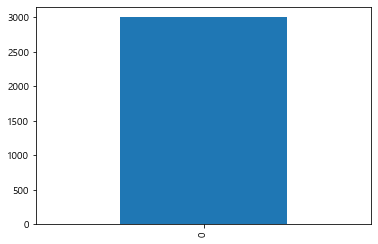

In [24]:
import matplotlib.pyplot as plt

# 라벨링에 따른 분포도 막대그래프
df_labeling['label'].value_counts().plot(kind='bar')

In [25]:
# 라벨링에 따른 분포도 표
train_data.groupby('label').size().reset_index(name = 'count')

,label,count
0,0,2253


In [ ]:
from konlpy.tag import Okt; t = Okt()

# Okt 실험
t.morphs('정상에 선 기쁨을 다른 사람들과 함께 나누자')

In [ ]:
# 불용어 설정
stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게']

In [ ]:
# 트레인 데이터 형태소 추출 및 불용어 제거
train_data['tokenized'] = train_data['text'].apply(t.morphs)
train_data['tokenized'] = train_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

In [ ]:
# 테스트 데이터 형태소 추출 및 불용어 제거
test_data['tokenized'] = test_data['text'].apply(t.morphs)
test_data['tokenized'] = test_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

In [ ]:
import numpy as np

# 트레인 데이터에 라벨에 따른 형태소 분류 후 배열 만들기
neutral_words = np.hstack(train_data[train_data.label == 0]['tokenized'].values)
negative_words = np.hstack(train_data[train_data.label == -1]['tokenized'].values)
positive_words = np.hstack(train_data[train_data.label == 1]['tokenized'].values)

In [ ]:
from collections import Counter

# 빈도수가 높은 상위 20개 중립 단어
neutral_word_count = Counter(neutral_words)
print(neutral_word_count.most_common(20))

In [ ]:
# 빈도수가 높은 상위 20개 부정 단어
negative_word_count = Counter(negative_words)
print(negative_word_count.most_common(20))

In [ ]:
# 빈도수가 높은 상위 20개 긍정 단어
positive_word_count = Counter(positive_words)
print(positive_word_count.most_common(20))

In [ ]:
from wordcloud import WordCloud

# 중립 wordcloud
wc = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf', width=400, height=400, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(neutral_word_count)
plt.figure()
plt.imshow(gen)

In [ ]:
# 부정 wordcloud
wc = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf', width=400, height=400, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(negative_word_count)
plt.figure()
plt.imshow(gen)

In [ ]:
# 긍정 wordcloud
wc = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf', width=400, height=400, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(positive_word_count)
plt.figure()
plt.imshow(gen)

In [ ]:
# 중립, 부정, 긍정에 따른 텍스트 길이 비교 시각화
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(10,5)) # 크기 설정
text_len = train_data[train_data['label']==0]['tokenized'].map(lambda x: len(x)) # 분류에 따른 텍스트 길이 추출
ax1.hist(text_len, color='purple') # 히스토그램 그리기
ax1.set_title('Neutral') # 제목 만들기
ax1.set_xlabel('length of samples') # X축 이름
ax1.set_ylabel('number of samples') # y축 이름
print('중립의 평균 길이 :', np.mean(text_len)) # 평균 길이 출력

text_len = train_data[train_data['label']==-1]['tokenized'].map(lambda x: len(x))
ax2.hist(text_len, color='blue')
ax2.set_title('Negative')
fig.suptitle('Words in texts')
ax2.set_xlabel('length of samples')
ax2.set_ylabel('number of samples')
print('부정의 평균 길이 :', np.mean(text_len))

text_len = train_data[train_data['label']==1]['tokenized'].map(lambda x: len(x))
ax3.hist(text_len, color='red')
ax3.set_title('Positive')
ax3.set_xlabel('length of samples')
ax3.set_ylabel('number of samples')
print('긍정의 평균 길이 :', np.mean(text_len))

In [ ]:
X_train = train_data['tokenized'].values
y_train = train_data['label'].values
X_test= test_data['tokenized'].values
y_test = test_data['label'].values

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

# 토큰화
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train) # 빈도수 기준으로 단어 집합 생성

In [ ]:
threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 빈도수가 threshold보다 적은 단어의 총 합
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# key는 단어, value는 빈도수
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 빈도수가 threshold보다 작을 경우
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

In [ ]:
vocab_size = total_cnt - rare_cnt + 2 # 0 = 패딩, 1 = OOV = +2
vocab_size # 단어 집합의 크기

In [ ]:
# 정수 시퀀스로 변환
tokenizer = Tokenizer(vocab_size, oov_token='OOV')
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train) # 앞에 만든 토큰의 인덱스만 추출해 배열 생성
X_test = tokenizer.texts_to_sequences(X_test) # 앞에 만든 토큰의 인덱스만 추출해 배열 생성

In [ ]:
print('최대 길이 :',max(len(text) for text in X_train))
print('평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(text) for text in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 텍스트 중 길이가 %s 이하인 텍스트의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [ ]:
max_len = 3 # 값을 바꾸면서 비율 높이기
below_threshold_len(max_len, X_train)

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 제로 패딩
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, GRU
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(GRU(hidden_units))
model.add(Dense(1, activation='softmax'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4) # 검증 데이터 손실이 4회 이상 조기 종료
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True) # 검증 데이터의 정확도가 이전보다 상승했을 경우에만 저장

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=64, validation_split=0.2) # 20%의 검증 데이터를 분리해 훈련이 적절히 되는지 확인 및 과적합 방지

In [ ]:
from tensorflow.keras.models import load_model

# 저장된 모델을 불러와 정확도 테스트
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

In [ ]:
import re

def sentiment_predict(new_sentence):
    new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)
    new_sentence = t.morphs(new_sentence)
    new_sentence = [word for word in new_sentence if not word in stopwords]
    encoded = tokenizer.texts_to_sequences([new_sentence])
    pad_new = pad_sequences(encoded, maxlen = max_len)
    
    score = float(loaded_model.predict(pad_new))
    if score == 0:
        print("{:.2f}% 확률로 중립입니다.".format(score * 100))
    elif score == -1 :
        print("{:.2f}% 확률로 부정입니다.".format((1 - score) * 100))
    else:
        print("{:.2f}% 확률로 긍정입니다.".format((1 - score) * 100))

In [ ]:
sentiment_predict()